<a href="https://colab.research.google.com/github/guypary/ai-eng-nbs-public/blob/master/project_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.optimizers import Adam

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Create visualizations of some images, and labels

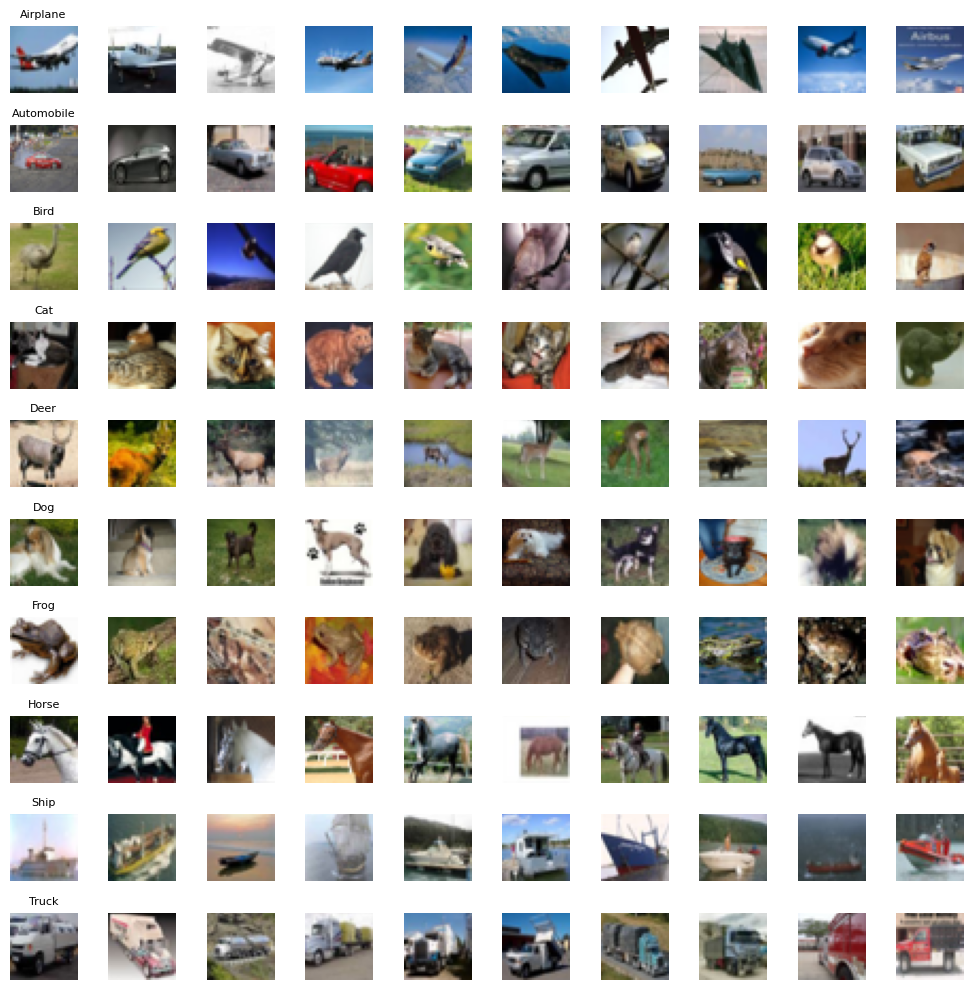

In [2]:
# CIFAR-10 class names
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]
# Visualize the image
# Create a 10x10 plot with 10 random samples per class
plt.figure(figsize=(10, 10))  # Set the figure size

# Loop through all 10 classes
for class_index in range(10):
    # Find indices where the label matches the class index
    class_indices = np.where(y_train == class_index)[0]
    # Randomly select 10 samples from these indices
    random_indices = np.random.choice(class_indices, 10, replace=False)

    # Loop through these 10 samples
    for i, image_index in enumerate(random_indices):
        plt.subplot(10, 10, class_index * 10 + i + 1)  # Create a subplot
        plt.imshow(x_train[image_index])  # Show the image
        plt.axis('off')  # Turn off axis
        # Add class name for the first image in the row
        if i == 0:
            plt.title(class_names[class_index], fontsize=8)

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

Convert labels to one-hot encoding

In [3]:
#Convert labels to one-hot encoding `to_categorical` converts labels like [0, 1, 2, ...] to one-hot encoded form

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)


In [4]:
# Check the convertion of lanels to 0,1...
print(y_train_one_hot,"\n")
print(y_test_one_hot, )

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]] 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [5]:
# Normalize the images
# Divide pixel values by 255 to scale them to [0, 1]
# x_train_normalized = x_train.astype('float32') / 255.0
# x_test_normalized = x_test.astype('float32') / 255.0

In [6]:
# Print example to confirm normalization
print("Original pixel value (before normalization):", x_train[0][0][0])
print("Normalized pixel value:", x_train_normalized[0][0][0])

Original pixel value (before normalization): [59 62 63]
Normalized pixel value: [0.23137255 0.24313726 0.24705882]


Data augmentation

In [61]:
#initialize resize and rescale layer
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(32, 32), # Resize to (32, 32)
  tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]
])

In [ ]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    # tf.keras.layers.RandomRotation(0.1),
    # tf.keras.layers.RandomZoom(0.1),
])

Building a model

In [77]:
model = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same',kernel_initializer='he_normal'),
        resize_and_rescale,
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same',kernel_initializer='he_normal'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same',kernel_initializer='he_normal'),
        BatchNormalization(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax', ),
        ]
    )

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_56 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_10 (Sequential)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 585,898 (2.24 MB)

 Trainable params: 584,746 (2.23 MB)

 Non-trainable params: 1,152 (4.50 KB)

Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.

In [78]:
from tensorflow.keras.optimizers import Adamax

model.compile(
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    optimizer=Adamax(learning_rate=0.001),  # SGD optimizer with a learning rate of 0.01
    metrics=['accuracy']  # Metric to monitor during training
)

Training the model

In [79]:
history = model.fit(
    x_train,        # Normalized training images
    y_train_one_hot,           # One-hot encoded training labels
    epochs=30,                 # Number of epochs to train the model
    batch_size=60,            # Number of samples per batch
    validation_split = 0.2,     # Validation Split
    validation_data=(x_test, y_test_one_hot)  # Validation data (test set)
)

Epoch 1/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.3630 - loss: 1.7591 - val_accuracy: 0.5488 - val_loss: 1.2718
Epoch 2/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5632 - loss: 1.2344 - val_accuracy: 0.6068 - val_loss: 1.1121
Epoch 3/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6353 - loss: 1.0342 - val_accuracy: 0.6364 - val_loss: 1.0314
Epoch 4/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6902 - loss: 0.8870 - val_accuracy: 0.6565 - val_loss: 0.9697
Epoch 5/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7320 - loss: 0.7664 - val_accuracy: 0.6853 - val_loss: 0.9187
Epoch 6/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7688 - loss: 0.6645 - val_accuracy: 0.6965 - val_loss: 0.8999
Epoch 7/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7980 - loss: 0.5719 - val_accuracy: 0.7011 - val_loss: 0.8996
Epoch 8/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8277 - loss: 0.4947 - val_accuracy: 

Ploting the accuaraccy

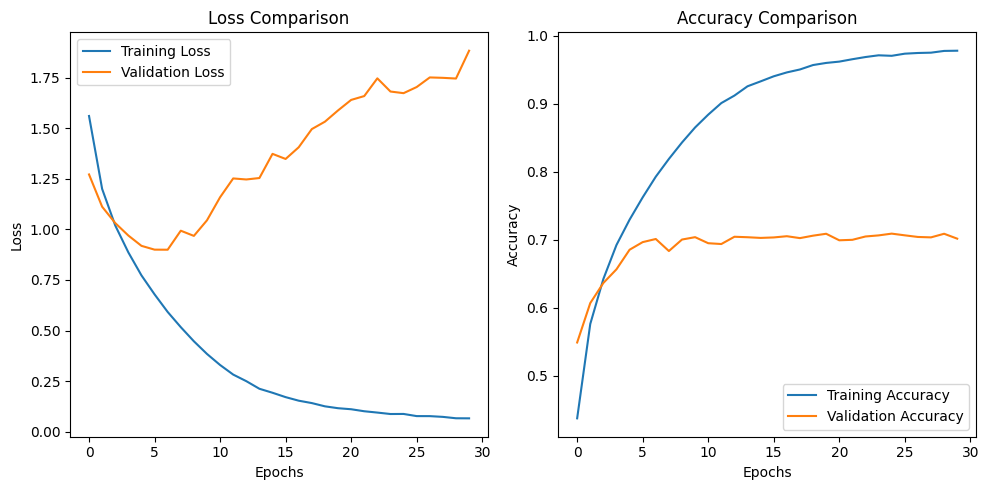

In [80]:
import matplotlib.pyplot as plt

# Extract the metrics from the training history of the current model
loss = history.history['loss']              # Training loss
val_loss = history.history['val_loss']      # Validation loss
accuracy = history.history['accuracy']      # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy

# Step 1: Plot the loss curves
plt.figure(figsize=(10, 5))  # Set figure size

# Training and validation loss
plt.subplot(1, 2, 1)  # Create the first subplot
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  # Add a legend to distinguish between lines

# Step 2: Plot the accuracy curves
plt.subplot(1, 2, 2)  # Create the second subplot
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()  # Add a legend

# Show the plots
plt.tight_layout()  # Adjust layout
plt.show()

Prediction on X

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6966 - loss: 1.9269
Test Accuracy: 0.70
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

    Airplane       0.77      0.71      0.74      1000
  Automobile       0.89      0.68      0.77      1000
        Bird       0.67      0.59      0.63      1000
         Cat       0.54      0.49      0.51      1000
        Deer       0.60      0.72      0.66      1000
         Dog       0.60      0.60      0.60      1000
        Frog       0.82      0.73      0.78      1000
       Horse       0.73      0.78      0.76      1000
        Ship       0.81      0.83      0.82      1000
       Truck       0.66      0.87      0.75      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



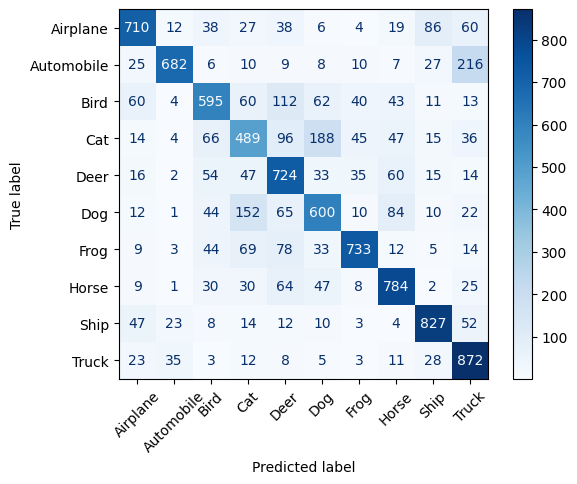

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot) # Changed y_test_onehot to y_test_one_hot
print(f"Test Accuracy: {test_acc:.2f}")
# Classification report
y_pred = np.argmax(model.predict(x_test), axis=1)
# The following line has been changed
y_true = np.argmax(y_test_one_hot, axis=1)  # Extract true labels from one-hot encoded y_test_one_hot
print(classification_report(y_true, y_pred, target_names=class_names))
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()

In [54]:
import numpy as np
from sklearn.metrics import confusion_matrix

preds = model.predict(x_test)
preds = np.argmax(preds, axis=1)
mg = np.argmax(y_train_one_hot, axis=1)

print(confusion_matrix(mg, preds))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


ValueError: Found input variables with inconsistent numbers of samples: [50000, 10000]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
Predicted Class for first image: 3


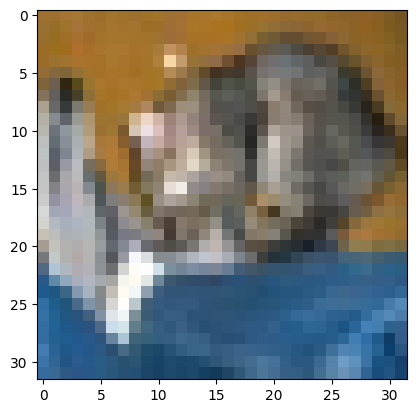

In [43]:
# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate the model on the test set
#loss, accuracy = model.evaluate(x_test / 255.0, to_categorical(y_test, num_classes=10), batch_size=64)
#print(f"Test Accuracy: {accuracy}")

# Make predictions
predictions = model.predict(x_test / 255.0)

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Display prediction for a single image
image = x_test[0]
image_batch = np.expand_dims(image / 255.0, axis=0)
single_prediction = model.predict(image_batch)
predicted_class = np.argmax(single_prediction)

print(f"Predicted Class for first image: {predicted_class}")
plt.imshow(image)
plt.show()